# Library

In [1]:
import math
import matplotlib.pyplot as plt
import simpy
import json
import random
import utils
import sys

import utils
from Satellite import *
from UE import *
from config import *
from AMF import *

In [2]:
POSITIONS = [(20000, 0)] * 10
#POSITIONS.append((21000, 0))


env = simpy.Environment()

# Deploy Core Function AMF
amf = AMF(core_delay=CORE_DELAY, env=env)

UEs = {}
satellites = {}

for sat_id in POS_SATELLITES:
    pos = POS_SATELLITES[sat_id]
    satellites[sat_id] = Satellite(
        identity=sat_id,
        position_x=pos[0],
        position_y=pos[1],
        velocity=SATELLITE_V,
        satellite_ground_delay=SATELLITE_GROUND_DELAY,
        ISL_delay=SATELLITE_SATELLITE_DELAY,
        core_delay=CORE_DELAY,
        AMF=amf,
        env=env)

# Deploying UEs following randomly generated positions
for index, position in enumerate(POSITIONS, start=1):
    UEs[index] = UE(
        identity=index,
        position_x=position[0],
        position_y=position[1],
        serving_satellite=satellites[1],
        satellite_ground_delay=SATELLITE_GROUND_DELAY,
        env=env)

# Connecting objects
utils.assign_group(UEs, GROUP_AREA_L)
HYBRID_THRESHOLD = utils.determine_group_threshold(UEs, GROUP_AREA_L)

for identity in satellites:
    satellites[identity].UEs = UEs
    satellites[identity].satellites = satellites
    satellites[identity].hybrid_threshold = 3

for identity in UEs:
    UEs[identity].satellites = satellites
    UEs[identity].UEs = UEs
    
amf.satellites = satellites
    

env.run(until=20000)

AMF 1 deployed at time 0, positioned at (0,0)
satellite 1 deployed at time 0, positioned at (-25000,0)
satellite 2 deployed at time 0, positioned at (-50000,0)
satellite 3 deployed at time 0, positioned at (-75000,0)
UE 1 deployed at time 0, positioned at (20000,0)
UE 2 deployed at time 0, positioned at (20000,0)
UE 3 deployed at time 0, positioned at (20000,0)
UE 4 deployed at time 0, positioned at (20000,0)
UE 5 deployed at time 0, positioned at (20000,0)
UE 6 deployed at time 0, positioned at (20000,0)
UE 7 deployed at time 0, positioned at (20000,0)
UE 8 deployed at time 0, positioned at (20000,0)
UE 9 deployed at time 0, positioned at (20000,0)
UE 10 deployed at time 0, positioned at (20000,0)
satellite 1 sends satellite 1 the message {"task": "GROUP_HANDOVER_NOTIFY", "groupID": "21_1", "left_x": 20000, "from": 1, "to": 1} at 2913
satellite 1 accepted msg:{"task": "GROUP_HANDOVER_NOTIFY", "groupID": "21_1", "left_x": 20000, "from": 1, "to": 1} at time 2913
satellite 1 handling msg

In [4]:
x = {}
x['x'] = {1:"123"}
x

{'x': {1: '123'}}

# Handover Estimation

In [ ]:
# M = 2 * R * R * math.acos(d / 2 / R) - d * (R*R - d*d/4)**0.5
# S = math.pi * R * R - M
# S * N / pi / R / R

# The number of devices requiring handover
def handout(R,N,d):
    pi = math.pi
    RES = N - 2*N/pi * math.acos(d / 2 / R) + d*N/pi * (1/R/R - (d*d)/(4*R**4))**0.5
    return RES

In [ ]:
# Example
R = 25 * 1000 # 25 km
v = 7.56 * 1000 # 7.56 km / h
t = 1 # 1 second
d = v * t # distance
N = 65519
number_handover = handout(R,N,d)
print(number_handover)

In [2]:
t_upperbound = 2*R/v - 0.1

x = []
timestamp = 0.01
while timestamp < t_upperbound:
    x.append(timestamp)
    timestamp += 0.01
y = []
for t in x:
    y.append(handout(R, N, v*t))
plt.plot(x, y, linestyle='-')

NameError: name 'R' is not defined

# Config

In [7]:
import hashlib
def generate_commitment(share):
    #result = str(share)
    encode_int = str(share).encode()
    result = hashlib.md5(encode_int).hexdigest()
    return result

c = generate_commitment(123)

str

# Experiment Setup

The time step is 1 ms

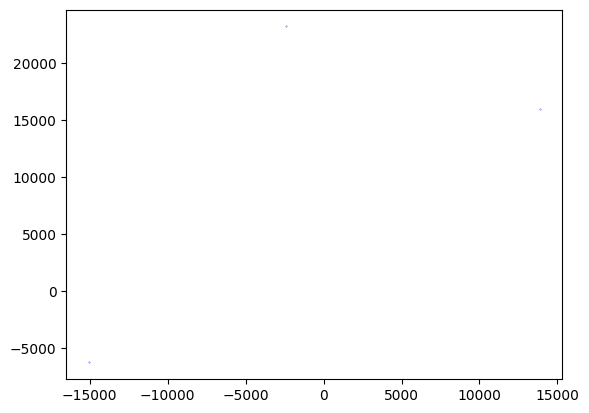

In [15]:
# uniform devices generator
def generate_points(n, R, x, y):
    def generate_one(R,x,y):
        r = R * math.sqrt(random.uniform(0, 1))
        theta = random.uniform(0, 1) * 2 * math.pi
        px = x + r * math.cos(theta)
        py = y + r * math.sin(theta)
        return (px, py)
    points = []
    for i in range(n):
        points.append(generate_one(R,x,y))
    return points

SATELLITE_R = 25 * 1000
NUMBER_UE = 3
SATELLITE_V = 7.56 * 1000
POSITIONS = generate_points(NUMBER_UE, SATELLITE_R-1*1000, 0, 0)
x_coords, y_coords = zip(*POSITIONS)
plt.scatter(x_coords, y_coords, color='blue', s = 0.05)
plt.show()

# Design Idea

## Communication Channel

1. The sender should wait the time and put the message in the receiver's Q
2. The sending action should through method "send_message()"

## Signal Processing

1. The processing of the signal is using CPU tasks

## Identity management

1. Each device including satellite will have a unique identifier (Not implemented)

## Message format

1. The message should follow the same format (Not implemented)

# Handover Protocol

## UE Class

In [16]:
# import math

# import simpy

# from Base import *
# from config import *


# class UE(Base):
#     def __init__(self,
#                  identity,
#                  position_x,
#                  position_y,
#                  satellite_ground_delay,
#                  serving_satellite,
#                  env):

#         # Config Initialization
#         Base.__init__(self,
#                       identity=identity,
#                       position_x=position_x,
#                       position_y=position_y,
#                       env=env,
#                       satellite_ground_delay=satellite_ground_delay,
#                       object_type="UE")

#         self.serving_satellite = serving_satellite

#         # Logic Initialization
#         self.timestamps = []

#         self.messageQ = simpy.Store(env)
#         self.cpus = simpy.Resource(env, UE_CPU)
#         self.state = ACTIVE
#         self.satellites = None

#         self.groupID = None
#         self.targetID = None
#         self.retransmit_counter = 0

#         # Running Process
#         env.process(self.init())
#         env.process(self.handle_messages())
#         env.process(self.action_monitor())

#     # =================== UE functions ======================
#     def handle_messages(self):
#         while True:
#             msg = yield self.messageQ.get()
#             print(f"{self.type} {self.identity} start handling msg:{msg} at time {self.env.now}")
#             data = json.loads(msg)
#             self.env.process(self.cpu_processing(data))

#     def cpu_processing(self, msg):
#         with self.cpus.request() as request:
#             task = msg['task']
#             if task == RRC_RECONFIGURATION:
#                 yield request
#                 satid = msg['from']
#                 # TODO one error raised for serveing satellite is none
#                 # TODO the suspect reason is synchronization issue with "switch to inactive"
#                 # TODO Note that the UE didn't wait for the latest response for retransmission.
#                 if self.state == WAITING_RRC_CONFIGURATION and satid == self.serving_satellite.identity:
#                     # get candidate target
#                     targets = msg['targets']
#                     # choose target
#                     self.targetID = targets[0]
#                     self.state = RRC_CONFIGURED
#                     self.retransmit_counter = 0
#                     print(f"{self.type} {self.identity} receives the configuration at {self.env.now}")
#                     self.timestamps[-1]['timestamp'].append(self.env.now)
#                     self.timestamps[-1]['isSuccess'] = True
#             elif task == RRC_RECONFIGURATION_COMPLETE_RESPONSE:
#                 yield request
#                 satid = msg['from']
#                 satellite = self.satellites[satid]
#                 if self.covered_by(satid):
#                     self.serving_satellite = satellite
#                     self.state = ACTIVE
#                     print(f"{self.type} {self.identity} finished handover at {self.env.now}")
#             elif task == SWITCH_TO_GROUP_HANDOVER:
#                 yield request
#                 satid = msg['from']
#                 heads = msg['head']
#                 if self.state == ACTIVE and self.serving_satellite.identity == satid:
#                     self.state = GROUP_ACTIVE
#                     if self.identity in heads:
#                         self.state = GROUP_ACTIVE_HEAD


#     def action_monitor(self):
#         while True:
#             # send measurement report
#             if self.state == ACTIVE and self.send_request_condition():
#                 candidates = []
#                 for satid in self.satellites:
#                     if self.covered_by(satid) and satid != self.serving_satellite.identity:
#                         candidates.append(satid)
#                 data = {
#                     "task": MEASUREMENT_REPORT,
#                     "candidate": candidates,
#                 }
#                 if len(candidates) != 0:
#                     self.env.process(
#                         self.send_message(
#                             delay=self.satellite_ground_delay,
#                             msg=data,
#                             Q=self.serving_satellite.messageQ,
#                             to=self.serving_satellite
#                         )
#                     )
#                     self.timestamps.append({'timestamp': [self.env.now]})  # This is the start time
#                     self.timestamps[-1]['from'] = self.serving_satellite.identity
#                     self.timer = self.env.now
#                     self.state = WAITING_RRC_CONFIGURATION
#             # Retransmit
#             if RETRANSMIT and self.state == WAITING_RRC_CONFIGURATION and self.env.now - self.timer > RETRANSMIT_THRESHOLD and self.retransmit_counter < MAX_RETRANSMIT:
#                 self.timer = self.env.now
#                 self.timestamps[-1]['timestamp'].append(self.env.now)  # retransmission time
#                 candidates = []
#                 for satid in self.satellites:
#                     if self.covered_by(satid) and satid != self.serving_satellite.identity:
#                         candidates.append(satid)
#                 data = {
#                     "task": RETRANSMISSION,
#                     "candidate": candidates
#                 }
#                 if len(candidates) != 0:
#                     self.env.process(
#                         self.send_message(
#                             delay=self.satellite_ground_delay,
#                             msg=data,
#                             Q=self.serving_satellite.messageQ,
#                             to=self.serving_satellite
#                         )
#                     )
#                     self.retransmit_counter += 1
#             # send random access request
#             if self.state == RRC_CONFIGURED:  # When the UE has the configuration
#                 if self.targetID and self.covered_by(self.targetID):  # The condition can be added here
#                     target = self.satellites[self.targetID]
#                     data = {
#                         "task": RRC_RECONFIGURATION_COMPLETE,
#                     }
#                     self.env.process(
#                         self.send_message(
#                             delay=self.satellite_ground_delay,
#                             msg=data,
#                             Q=target.messageQ,
#                             to=target
#                         )
#                     )
#                     self.state = WAITING_RRC_RECONFIGURATION_COMPLETE_RESPONSE
#             # switch to inactive
#             if self.serving_satellite is not None and self.outside_coverage():
#                 print(
#                     f"UE {self.identity} lost connection at time {self.env.now} from satellite {self.serving_satellite.identity}")
#                 self.serving_satellite = None
#                 if self.state == ACTIVE or self.state == WAITING_RRC_CONFIGURATION:
#                     if self.state == WAITING_RRC_CONFIGURATION:
#                         print(f"UE {self.identity} handover failure at time {self.env.now}")
#                         self.timestamps[-1]['timestamp'].append(self.env.now)
#                         self.timestamps[-1]['isSuccess'] = False
#                     self.state = INACTIVE
#             yield self.env.timeout(1)

#     # ==================== Utils (Not related to Simpy) ==============
#     def covered_by(self, satelliteID):
#         satellite = self.satellites[satelliteID]
#         d = math.sqrt(((self.position_x - satellite.position_x) ** 2) + (
#                 (self.position_y - satellite.position_y) ** 2))
#         return d <= SATELLITE_R

#     def send_request_condition(self):
#         d = math.sqrt(((self.position_x - self.serving_satellite.position_x) ** 2) + (
#                 (self.position_y - self.serving_satellite.position_y) ** 2))
#         decision = (d > 23 * 1000 and self.position_x < self.serving_satellite.position_x
#                     and self.state == ACTIVE)
#         return decision

#     def outside_coverage(self):
#         d = math.sqrt(((self.position_x - self.serving_satellite.position_x) ** 2) + (
#                 (self.position_y - self.serving_satellite.position_y) ** 2))
#         # TODO this is not accurate
#         return d >= 25 * 1000 and self.position_x < self.serving_satellite.position_x


## Satellite Class

In [17]:
# import random

# import simpy
# import math
# from Base import *
# from config import *
# import utils

# class cumulativeMessageCount:
#     def __init__(self):
#         self.total_messages = 0
#         self.message_from_UE_measurement = 0
#         self.message_from_UE_retransmit = 0
#         self.message_from_UE_RA = 0
#         self.message_from_satellite = 0

#     def increment_UE_measurement(self):
#         self.total_messages += 1
#         self.message_from_UE_measurement += 1

#     def increment_UE_retransmit(self):
#         self.total_messages += 1
#         self.message_from_UE_retransmit += 1

#     def increment_satellite(self):
#         self.total_messages += 1
#         self.message_from_satellite += 1

#     def increment_UE_RA(self):
#         self.total_messages += 1
#         self.message_from_UE_RA += 1


# class Satellite(Base):
#     def __init__(self,
#                  identity,
#                  position_x,
#                  position_y,
#                  velocity,
#                  satellite_ground_delay,
#                  ISL_delay,
#                  core_delay,
#                  AMF,
#                  env):

#         Base.__init__(self,
#                       identity=identity,
#                       position_x=position_x,
#                       position_y=position_y,
#                       env=env,
#                       satellite_ground_delay=satellite_ground_delay,
#                       object_type="satellite")

#         # Config Initialization
#         self.ISL_delay = ISL_delay
#         self.velocity = velocity
#         self.core_delay = core_delay

#         # Logic Initialization
#         self.messageQ = simpy.Store(env)
#         self.AMF = AMF
#         self.UEs = None
#         self.satellites = None
#         self.cpus = simpy.PriorityResource(env, capacity=SATELLITE_CPU)  # Concurrent processing
#         self.counter = cumulativeMessageCount()
#         self.group_count = {}
#         self.group_aggregators = {}
#         self.group_share_commit = {}
#         self.hybrid_threshold = None

#         # Running process
#         self.env.process(self.init())  # Print Deployment information
#         self.env.process(self.update_position())
#         self.env.process(self.monitor_group_information())
#         self.env.process(self.handle_messages())

#     def handle_messages(self):
#         """ Get the task from message Q and start a CPU processing process """
#         while True:
#             msg = yield self.messageQ.get()
#             data = json.loads(msg)
#             task = data['task']
#             if task == MEASUREMENT_REPORT or task == RETRANSMISSION:
#                 if len(self.cpus.queue) < QUEUED_SIZE:
#                     print(f"{self.type} {self.identity} accepted msg:{msg} at time {self.env.now}")
#                     self.env.process(self.cpu_processing(msg=data, priority=2))
#                 else:
#                     print(f"{self.type} {self.identity} dropped msg:{msg} at time {self.env.now}")
#             else:
#                 print(f"{self.type} {self.identity} accepted msg:{msg} at time {self.env.now}")
#                 self.env.process(self.cpu_processing(msg=data, priority=1))

#     # =================== Satellite functions ======================

#     def cpu_processing(self, msg, priority):
#         """ Processing the task from the message Q

#         Args:
#             msg: the json object from message Q

#         """
#         with self.cpus.request(priority=priority) as request:
#             yield request
#             print(f"{self.type} {self.identity} handling msg:{msg} at time {self.env.now}")
#             # Get the task and processing time
#             task = msg['task']

#             # handle the task by cases
#             if task == MEASUREMENT_REPORT or task == RETRANSMISSION:
#                 processing_time = PROCESSING_TIME[task]
#                 if task == MEASUREMENT_REPORT:
#                     self.counter.increment_UE_measurement()
#                 else:
#                     self.counter.increment_UE_retransmit()
#                 ueid = msg['from']
#                 candidates = msg['candidate']
#                 UE = self.UEs[ueid]
#                 if self.connected(UE):
#                     yield self.env.timeout(processing_time)
#                 if self.connected(UE):
#                     # send the response to UE
#                     data = {
#                         "task": HANDOVER_REQUEST,
#                         "ueid": ueid
#                     }
#                     # for now, just random. TODO
#                     target_satellite_id = random.choice(candidates)
#                     target_satellite = self.satellites[target_satellite_id]
#                     self.env.process(
#                         self.send_message(
#                             delay=self.ISL_delay,
#                             msg=data,
#                             Q=target_satellite.messageQ,
#                             to=target_satellite
#                         )
#                     )
#             elif task == HANDOVER_ACKNOWLEDGE:
#                 processing_time = PROCESSING_TIME[task]
#                 self.counter.increment_satellite()
#                 satellite_id = msg['from']
#                 ueid = msg['ueid']
#                 UE = self.UEs[ueid]
#                 if self.connected(UE):
#                     yield self.env.timeout(processing_time)
#                 if self.connected(UE):
#                     data = {
#                         "task": RRC_RECONFIGURATION,
#                         "targets": [satellite_id],
#                     }
#                     self.env.process(
#                         self.send_message(
#                             delay=self.satellite_ground_delay,
#                             msg=data,
#                             Q=UE.messageQ,
#                             to=UE
#                         )
#                     )
#             elif task == HANDOVER_REQUEST:
#                 processing_time = PROCESSING_TIME[task]
#                 self.counter.increment_satellite()
#                 satellite_id = msg['from']
#                 ueid = msg['ueid']
#                 yield self.env.timeout(processing_time)
#                 data = {
#                     "task": HANDOVER_ACKNOWLEDGE,
#                     "ueid": ueid
#                 }
#                 source_satellite = self.satellites[satellite_id]
#                 self.env.process(
#                     self.send_message(
#                         delay=self.ISL_delay,
#                         msg=data,
#                         Q=source_satellite.messageQ,
#                         to=source_satellite
#                     )
#                 )
#             elif task == RRC_RECONFIGURATION_COMPLETE:
#                 processing_time = PROCESSING_TIME[task]
#                 self.counter.increment_UE_RA()
#                 ue_id = msg['from']
#                 UE = self.UEs[ue_id]
#                 yield self.env.timeout(processing_time)
#                 data = {
#                     "task": RRC_RECONFIGURATION_COMPLETE_RESPONSE,
#                 }
#                 self.env.process(
#                     self.send_message(
#                         delay=self.satellite_ground_delay,
#                         msg=data,
#                         Q=UE.messageQ,
#                         to=UE
#                     )
#                 )
#                 data2 = {
#                     "task": PATH_SHIFT_REQUEST,
#                 }
#                 self.env.process(
#                     self.send_message(
#                         delay=self.core_delay,
#                         msg=data2,
#                         Q=self.AMF.messageQ,
#                         to=self.AMF
#                     )
#                 )
#             elif task == GROUP_HANDOVER_NOTIFY:
#                 # Determine processing time and estimate if worth processing
#                 groupID = msg['groupID']
#                 left_x = msg['left_x']
#                 UE_list = self.group_count[groupID]
#                 processing_time = len(UE_list) * PROCESSING_TIME[PROCESS_ONE_UE]
#                 estimate_time = processing_time + self.satellite_ground_delay
#                 ratio = 1 / 1000
#                 if ratio * estimate_time * self.velocity + self.position_x < left_x:
#                     yield self.env.timeout(processing_time)
#                     aggregatorIDs = random.sample(UE_list, 2)
#                     print(f"{self.type} {self.identity} notifies group {groupID} at time {self.env.now}")
#                     ID_commitment = {}
#                     for ueID in UE_list:
#                         UE = self.UEs[ueID]
#                         if self.connected(UE):
#                             share = utils.generate_share()
#                             commit = utils.generate_commitment(share)
#                             self.group_share_commit[ueID] = (share, commit)
#                             ID_commitment[ueID] = commit
#                         else:
#                             print("ERROR This shouldn't happen")
#                     for ueID in UE_list:
#                         UE = self.UEs[ueID]
#                         data = {
#                             "task": SWITCH_TO_GROUP_HANDOVER,
#                             "share": share,
#                             "commit": commit,
#                             "head": aggregatorIDs,
#                             "commitment_map": ID_commitment,
#                             "threshold": 3 #TODO This needs some change
#                         }
#                         self.env.process(
#                             self.send_message(
#                                 delay=self.satellite_ground_delay,
#                                 msg=data,
#                                 Q=UE.messageQ,
#                                 to=UE
#                             )
#                         )

#             print(f"{self.type} {self.identity} finished processing msg:{msg} at time {self.env.now}")

#     def update_position(self):
#         """ Continuous updating the object location. """
#         while True:
#             yield self.env.timeout(1)  # Time between position updates
#             # Update x and y based on velocity
#             # Calculate time ratio
#             ratio = 1 / 1000
#             # direction set to right
#             self.position_x += self.velocity * ratio

#     # TODO The group information should be dynamic in real deployment.
#     # Such update in real life should not cause delay, so, in our simulation, we update every ms.
#     # TODO But accuracy may be affected
#     def monitor_group_information(self):
#         while True:
#             yield self.env.timeout(1)
#             group_info = {}
#             for id in self.UEs:
#                 UE = self.UEs[id]
#                 if UE.serving_satellite is not None and UE.serving_satellite.identity == self.identity and UE.state == ACTIVE:
#                     groupID = UE.groupID
#                     if groupID not in group_info:
#                         group_info[groupID] = []
#                     group_info[groupID].append(id)
#             self.group_count = group_info
#             for groupID in group_info:
#                 if groupID not in self.group_aggregators:
#                     xy =  groupID.split('_')
#                     x = int(xy[0])
#                     y = int(xy[1])
#                     ul, ru, rd, ld = utils.determine_edge_point(x, y, GROUP_AREA_L)
#                     # TODO This parameter really means some UEs must random access in time.
#                     R = 24* 1000
#                     if (self.cover_point_with_range(ru[0], ru[1], R)
#                             and self.cover_point_with_range(rd[0], rd[1], R)
#                             and ul[0] > self.position_x
#                             and len(group_info[groupID])) >= self.hybrid_threshold:
#                         self.group_aggregators[groupID] = []
#                         # Notify UEs and assign aggregators Task.
#                         data = {
#                             "task": GROUP_HANDOVER_NOTIFY,
#                             "groupID": groupID,
#                             "left_x": ul[0]
#                         }
#                         self.env.process(
#                             self.send_message(
#                                 delay=0,
#                                 msg=data,
#                                 Q=self.messageQ,
#                                 to=self
#                             )
#                         )



#     # ==================== Utils (Not related to Simpy) ==============
#     def connected(self, UE):
#         if UE.serving_satellite is None:
#             return False
#         else:
#             return UE.serving_satellite.identity == self.identity
#     def cover_point_with_range(self, pos_x, pos_y, R):
#         d = math.sqrt(((pos_x - self.position_x) ** 2) + (
#                 (pos_y - self.position_y) ** 2))
#         return d <= R


In [18]:
# import simpy

# from Base import *
# from config import *


# class AMF(Base):
#     def __init__(self,
#                  core_delay,
#                  env):

#         Base.__init__(self,
#                       identity=1,
#                       position_x=0,
#                       position_y=0,
#                       env=env,
#                       satellite_ground_delay=0,
#                       object_type="AMF")

#         # Config Initialization
#         self.core_delay = core_delay
#         self.satellites = None

#         # Logic Initialization
#         self.messageQ = simpy.Store(env)
#         self.cpus = simpy.Resource(env, 100)  # Concurrent processing

#         # Running process
#         self.env.process(self.init())  # Print Deployment information
#         self.env.process(self.handle_messages())

#     def handle_messages(self):
#         """ Get the task from message Q and start a CPU processing process """
#         while True:
#             msg = yield self.messageQ.get()
#             print(f"{self.type} {self.identity} start handling msg:{msg} at time {self.env.now}")
#             data = json.loads(msg)
#             self.env.process(self.cpu_processing(data))

#     # =================== Satellite functions ======================

#     def cpu_processing(self, msg):
#         """ Processing the task from the message Q

#         Args:
#             msg: the json object from message Q

#         """
#         with self.cpus.request() as request:
#             # Get the task and processing time
#             task = msg['task']
#             processing_time = PROCESSING_TIME[task]

#             # handle the task by cases
#             if task == PATH_SHIFT_REQUEST:
#                 satellite_id = msg['from']
#                 satellite = self.satellites[satellite_id]
#                 yield request
#                 yield self.env.timeout(processing_time)

# Running Experiment

In [19]:
# POSITIONS = [(-25000+100, 0),(-13000, -20711),(-13000, -20711),(-13000, -20711),(-13000, -20711),(-13000, -20711), (-13000,20711)]
# #POSITIONS = [(-25000, 0), (-23000, 0)]
# #POSITIONS = [(-13000, -20711)]

# env = simpy.Environment()

# # Deploy Core Function AMF
# amf = AMF(core_delay=CORE_DELAY, env=env)

# UEs = {}
# satellites = {}

# for sat_id in POS_SATELLITES:
#     pos = POS_SATELLITES[sat_id]
#     satellites[sat_id] = Satellite(
#         identity=sat_id,
#         position_x=pos[0],
#         position_y=pos[1],
#         velocity=SATELLITE_V,
#         satellite_ground_delay=SATELLITE_GROUND_DELAY,
#         ISL_delay=SATELLITE_SATELLITE_DELAY,
#         core_delay=CORE_DELAY,
#         AMF=amf,
#         env=env)

# # Deploying UEs following randomly generated positions
# for index, position in enumerate(POSITIONS, start=1):
#     UEs[index] = UE(
#         identity=index,
#         position_x=position[0],
#         position_y=position[1],
#         serving_satellite=satellites[1],
#         satellite_ground_delay=SATELLITE_GROUND_DELAY,
#         env=env)

# # Connecting objects

# for identity in satellites:
#     satellites[identity].UEs = UEs
#     satellites[identity].satellites = satellites

# for identity in UEs:
#     UEs[identity].satellites = satellites
    
    
# amf.satellites = satellites
    

# env.run(until=15000)

# Group Test

In [20]:
POSITIONS = [(20000, 0)] * 10


env = simpy.Environment()

# Deploy Core Function AMF
amf = AMF(core_delay=CORE_DELAY, env=env)

UEs = {}
satellites = {}

for sat_id in POS_SATELLITES:
    pos = POS_SATELLITES[sat_id]
    satellites[sat_id] = Satellite(
        identity=sat_id,
        position_x=pos[0],
        position_y=pos[1],
        velocity=SATELLITE_V,
        satellite_ground_delay=SATELLITE_GROUND_DELAY,
        ISL_delay=SATELLITE_SATELLITE_DELAY,
        core_delay=CORE_DELAY,
        AMF=amf,
        env=env)

# Deploying UEs following randomly generated positions
for index, position in enumerate(POSITIONS, start=1):
    UEs[index] = UE(
        identity=index,
        position_x=position[0],
        position_y=position[1],
        serving_satellite=satellites[1],
        satellite_ground_delay=SATELLITE_GROUND_DELAY,
        env=env)

# Connecting objects
utils.assign_group(UEs, GROUP_AREA_L)
HYBRID_THRESHOLD = utils.determine_group_threshold(UEs, GROUP_AREA_L)

for identity in satellites:
    satellites[identity].UEs = UEs
    satellites[identity].satellites = satellites
    satellites[identity].hybrid_threshold = 3

for identity in UEs:
    UEs[identity].satellites = satellites    
    
amf.satellites = satellites
    

env.run(until=15000)

AMF 1 deployed at time 0, positioned at (0,0)
satellite 1 deployed at time 0, positioned at (-25000,0)
satellite 2 deployed at time 0, positioned at (-37500.0,0)
satellite 3 deployed at time 0, positioned at (-50000,0)
UE 1 deployed at time 0, positioned at (20000,0)
UE 2 deployed at time 0, positioned at (20000,0)
UE 3 deployed at time 0, positioned at (20000,0)
UE 4 deployed at time 0, positioned at (20000,0)
UE 5 deployed at time 0, positioned at (20000,0)
UE 6 deployed at time 0, positioned at (20000,0)
UE 7 deployed at time 0, positioned at (20000,0)
UE 8 deployed at time 0, positioned at (20000,0)
UE 9 deployed at time 0, positioned at (20000,0)
UE 10 deployed at time 0, positioned at (20000,0)
satellite 1 sends satellite 1 the message {"task": "GROUP_HANDOVER_NOTIFY", "groupID": "21_1", "left_x": 20000, "from": 1, "to": 1} at 2913
satellite 1 accepted msg:{"task": "GROUP_HANDOVER_NOTIFY", "groupID": "21_1", "left_x": 20000, "from": 1, "to": 1} at time 2913
satellite 1 handling m

In [14]:
UEs[1].groupID

'21_1'

# Result Analysis

In [11]:
# counter_request = 0
# counter_success = 0
# Success_UE_Positions = []
# for i in UEs:
#     ue = UEs[i]
#     if ue.sentHandoverRequest == True:
#         counter_request += 1
#     if ue.hasHandoverConfiguration == True:
#         counter_success += 1
#         Success_UE_Positions.append((ue.position_x, ue.position_y))
# print(f"{counter_request} UEs sent the handover requests")
# print(f"{counter_success} UEs received the handover configuration")

In [12]:
import pickle
import pickletools
import utils

with open('../res/defaultres/graph_datadata_object.pkl', 'rb') as inp:
    data = pickle.load(inp)

In [13]:
SATELLITE_CPU

1